In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()
matplotlib.rcParams.update({"font.size": 22})

blues = sns.color_palette("Blues")
oranges = sns.color_palette("Oranges")

In [19]:
def H(x, v):
    out = 2*x/v
    out[x<-v/2] = -1
    out[x>v/2] = 1
    return out

def H_grad(xx, v, sigma):
    return 1/sigma/np.sqrt(2*np.pi) * np.exp(-np.power((v/2 - xx),2))

def H_grad2(x, v, sigma):
    out = np.ones_like(x)*2/v
    out[x<-v/2] = 0
    out[x>v/2] = 0
    return out

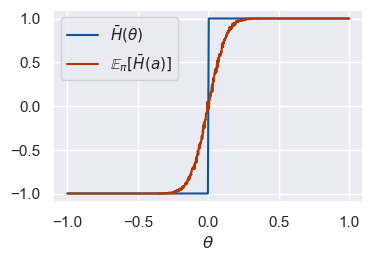

In [20]:
v=0.005
sigma = 0.1
N = 1000
np.random.seed(0)

plt.figure(figsize=(4,2.5))

# Raw data sample
xx = np.linspace(-1,1, 1000)
plt.plot(xx, H(xx,v), c=blues[-1], label=r"$\bar{H}(\theta)$")

# now sample with noise
yy = np.zeros_like(xx)
for i in range(len(yy)):
    w = np.random.normal(0.0, sigma, N)
    yy[i] = np.mean(H(xx[i]+w, v))
plt.plot(xx, yy, c=oranges[-1], label=r"$\mathbb{E}_\pi [ \bar{H}(a)]$")
plt.legend()
plt.xlabel(r"$\theta$")
# plt.tight_layout()
plt.savefig("soft_heaviside.pdf", bbox_inches='tight')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 24535.70it/s]


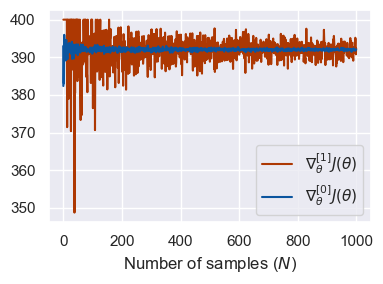

In [5]:
np.random.seed(0)

# single point version
point = 0.0
# True gradients
true_grad = H_grad2(np.array([point]), v, sigma)
baseline = H(np.array([point]), v)

plt.figure(figsize=(4,3))

# Compute biases
zobg_bias = np.zeros(N)
fobg_bias = np.zeros(N)
for n in tqdm(range(1,N+1)):
    w = np.random.normal(0.0, sigma, n)
    zobg = np.mean(1/sigma**2 * (H(point+w,v) - baseline)*w)
    fobg = np.mean(H_grad2(point+w, v, sigma))
    zobg_bias[n-1] = np.mean(np.abs(zobg - true_grad))
    fobg_bias[n-1] = np.mean(np.abs(fobg - true_grad))
    
plt.plot(np.arange(N), fobg_bias, c=oranges[-1], label=r"$\nabla_{\theta}^{[1]} J(\theta)$")
plt.plot(np.arange(N), zobg_bias, c=blues[-1], label=r"$\nabla_{\theta}^{[0]} J(\theta)$")
plt.legend()
plt.xlabel(r"Number of samples ($N$)")
plt.tight_layout()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.71it/s]


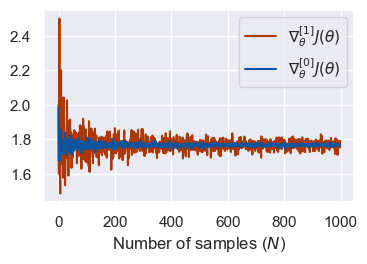

In [21]:
np.random.seed(0)

# True gradients
true_grad = H_grad2(xx, v, sigma)
baseline = H(xx, v)

plt.figure(figsize=(4,2.5))

# ZOBG gradient estimation
zobg_bias = np.zeros(N)
fobg_bias = np.zeros(N)
for n in tqdm(range(1,N+1)):
    zobg = np.zeros_like(xx)
    fobg = np.zeros_like(xx)
    for i in range(len(xx)):
        w = np.random.normal(0.0, sigma, n)
        zobg[i] = np.mean(1/sigma**2 * (H(xx[i]+w,v) - baseline[i])*w)
        fobg[i] = np.mean(H_grad2(xx[i]+w, v, sigma))
    zobg_bias[n-1] = np.mean(np.abs(zobg - true_grad))
    fobg_bias[n-1] = np.mean(np.abs(fobg - true_grad))

plt.plot(np.arange(N), fobg_bias, c=oranges[-1], label=r"$\nabla_{\theta}^{[1]} J(\theta)$")
plt.plot(np.arange(N), zobg_bias, c=blues[-1], label=r"$\nabla_{\theta}^{[0]} J(\theta)$")
plt.legend()
plt.xlabel(r"Number of samples ($N$)")
# plt.tight_layout()
plt.savefig("soft_heaviside_bias.pdf", bbox_inches='tight')